In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

from scipy import stats
from scipy.stats import norm, skew
from sklearn.pipeline import make_pipeline
from statistics import mode

%matplotlib inline
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Se limita a 3 posiciones los float

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #Ignora los warning

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#Importamos las bases de datos
train = pd.read_csv("train.csv",sep=";")
test = pd.read_csv("test.csv",sep=";",nrows=1459)

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
train_ID = train.Id.values
test_ID = test.Id.values

In [8]:
#Eliminamos el ID de nuestros bases de datos ya que en los analisis no nor sirve
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Analisis de Datos

### Outliers

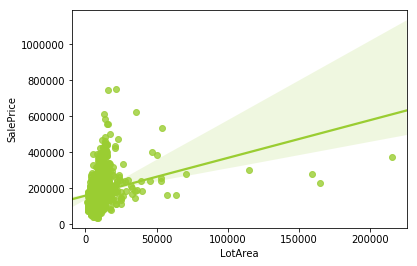

In [9]:
sns.regplot(x=train['LotArea'], y=train['SalePrice'], fit_reg=True, color = 'yellowgreen')
plt.show()

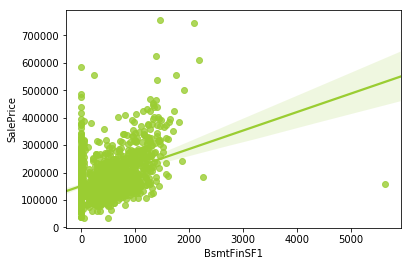

In [10]:
sns.regplot(x=train['BsmtFinSF1'], y=train['SalePrice'], fit_reg=True, color = 'yellowgreen')
plt.show()

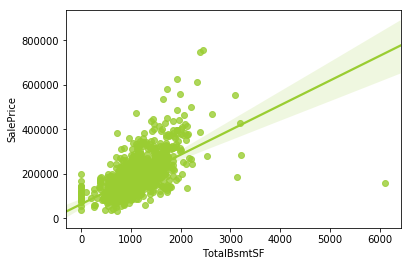

In [11]:
sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=True, color = 'yellowgreen')
plt.show()

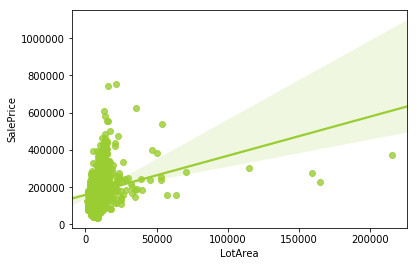

In [12]:
sns.regplot(x=train['LotArea'], y=train['SalePrice'], fit_reg=True, color = 'yellowgreen')
plt.show()

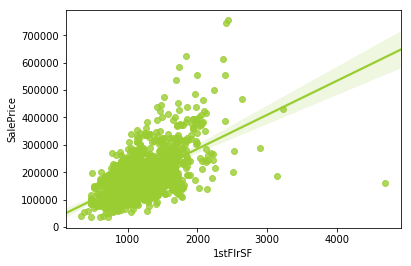

In [13]:
sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'], fit_reg=True, color = 'yellowgreen')
plt.show()

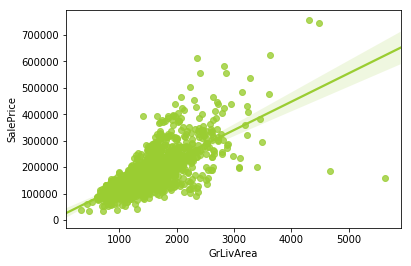

In [14]:
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=True, color = 'yellowgreen')
plt.show()

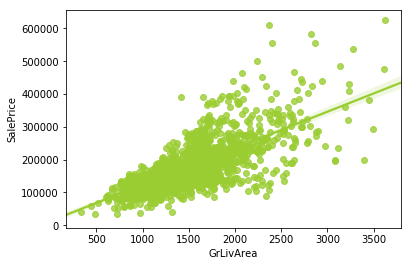

In [15]:
# Eliminando dos valores extremos extremos en la esquina inferior derecha
train = train.drop(train[(train['GrLivArea']>4000)].index)

# Volvemos a ver el grafico
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=True, color = 'yellowgreen')
plt.show()

### Notas :
Eliminar todos los valores atípicos no es recomendable. Por lo tanto, solo decidimos borrar los valores atipicos relacionados con GrLivArea, estos valores ya que son muy grandes y muy malos, ya que son áreas extremadamente grandes a precios muy bajos.
Eliminar estos datos son una recomendacion del creado de esta base de datos.

### Variable Objetivo: SalesPrice 

In [16]:
train['SalePrice'].describe()

count     1456.000
mean    180151.234
std      76696.593
min      34900.000
25%     129900.000
50%     163000.000
75%     214000.000
max     625000.000
Name: SalePrice, dtype: float64

Los cuartiles son los tres valores de la variable que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos.
Como se puede apreciar en la siguiente imagen se puede apreciar los tres cuartiles, así como sus outilers, de los cuales se puede apreciar que hay 2 que son valores altamenten atípicos

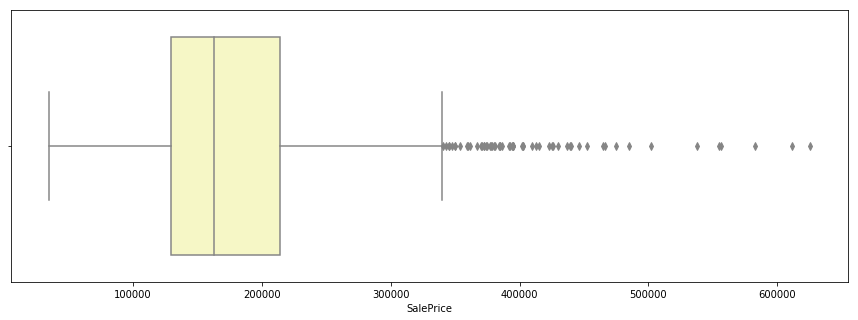

In [17]:
plt.figure(figsize = (15, 5))
sns.boxplot(train['SalePrice'], data = train, palette = 'RdYlGn')

### Carácteristicas

Primero vamos a concatenar los datos de entrenamiento y los datos de test en el mismo dataframe, esto nos servirá para el análisis de datos perdidos o incompletos más adelante.

In [18]:
#Guardamos el numero de filas de  "train" y "test"
ntrain = train.shape[0]
ntest = test.shape[0]

#Creamos la variable y_train
y_train = train.SalePrice.values

#Creamos la nueva base de datos que lleva tanto la informacion de train y test
all_data = pd.concat((train, test)).reset_index(drop=True)

#Descartamos la variable SalePrice que no está dentro del analisis
all_data.drop(['SalePrice'], axis=1, inplace=True)

### Datos Perdidos

In [19]:
missing_data = (all_data.isnull().sum() / len(all_data)) * 100
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)[:30]
missing_aux = pd.DataFrame({'Ratio de Perdida' :missing_data})
missing_aux.head(20)

,Ratio de Perdida
PoolQC,99.726
MiscFeature,96.398
Alley,93.208
Fence,80.446
FireplaceQu,48.714
LotFrontage,16.672
GarageQual,5.455
GarageCond,5.455
GarageFinish,5.455
GarageYrBlt,5.455


Text(0.5, 1.0, 'Porcentaje de perdida por característica')

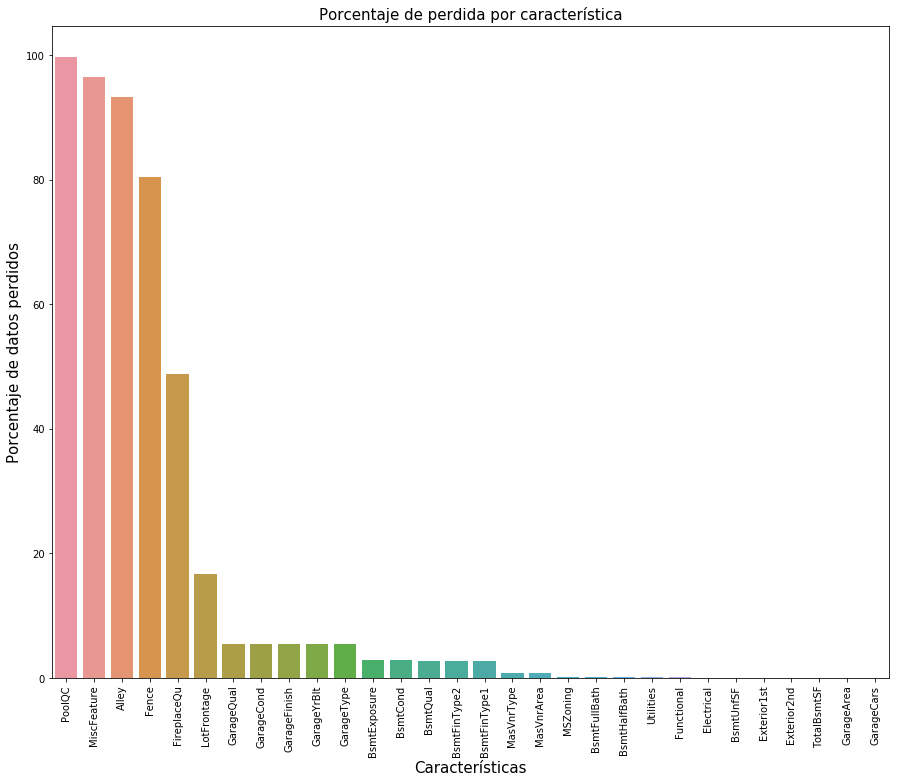

In [20]:
#Ahora aclaremos estos datos trazándolos en un gráfico:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data)
plt.xlabel('Características', fontsize=15)
plt.ylabel('Porcentaje de datos perdidos', fontsize=15)
plt.title('Porcentaje de perdida por característica', fontsize=15)

### Correlacion de Datos

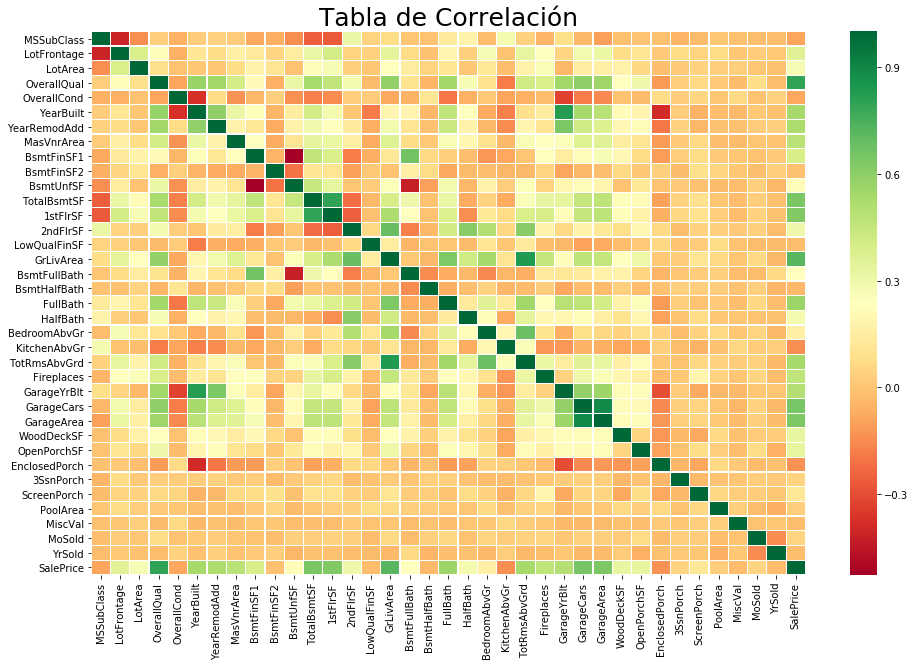

In [21]:
#La correlación constituye una técnica estadística que nos indica si dos variables están relacionadas o no.
corr = train.corr()
plt.figure(figsize=(16, 10))
plt.title('Tabla de Correlación', fontsize=25)
sns.heatmap(corr, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

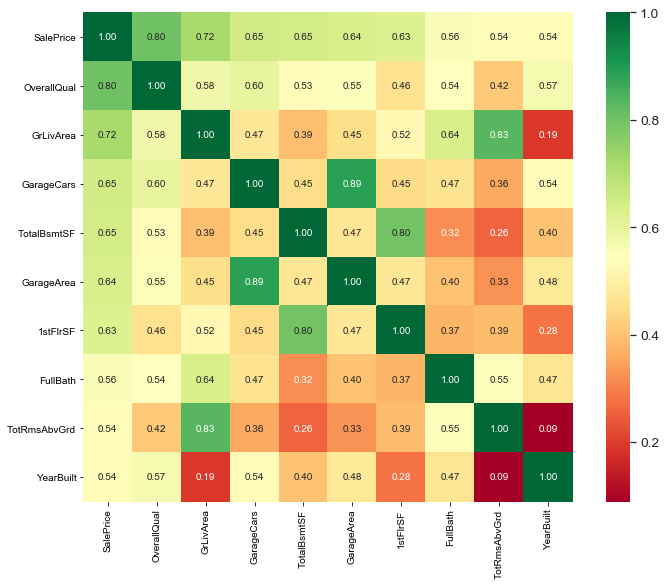

In [22]:
#Ahora solo mostraremos las 10 caracteristicas mas correlacionadas
#con relacion a SalePrice
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
plt.subplots(figsize=(12,9))
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values, cmap = 'RdYlGn', linecolor = 'white')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Vamos a ver rápidamente las relaciones entre las variables

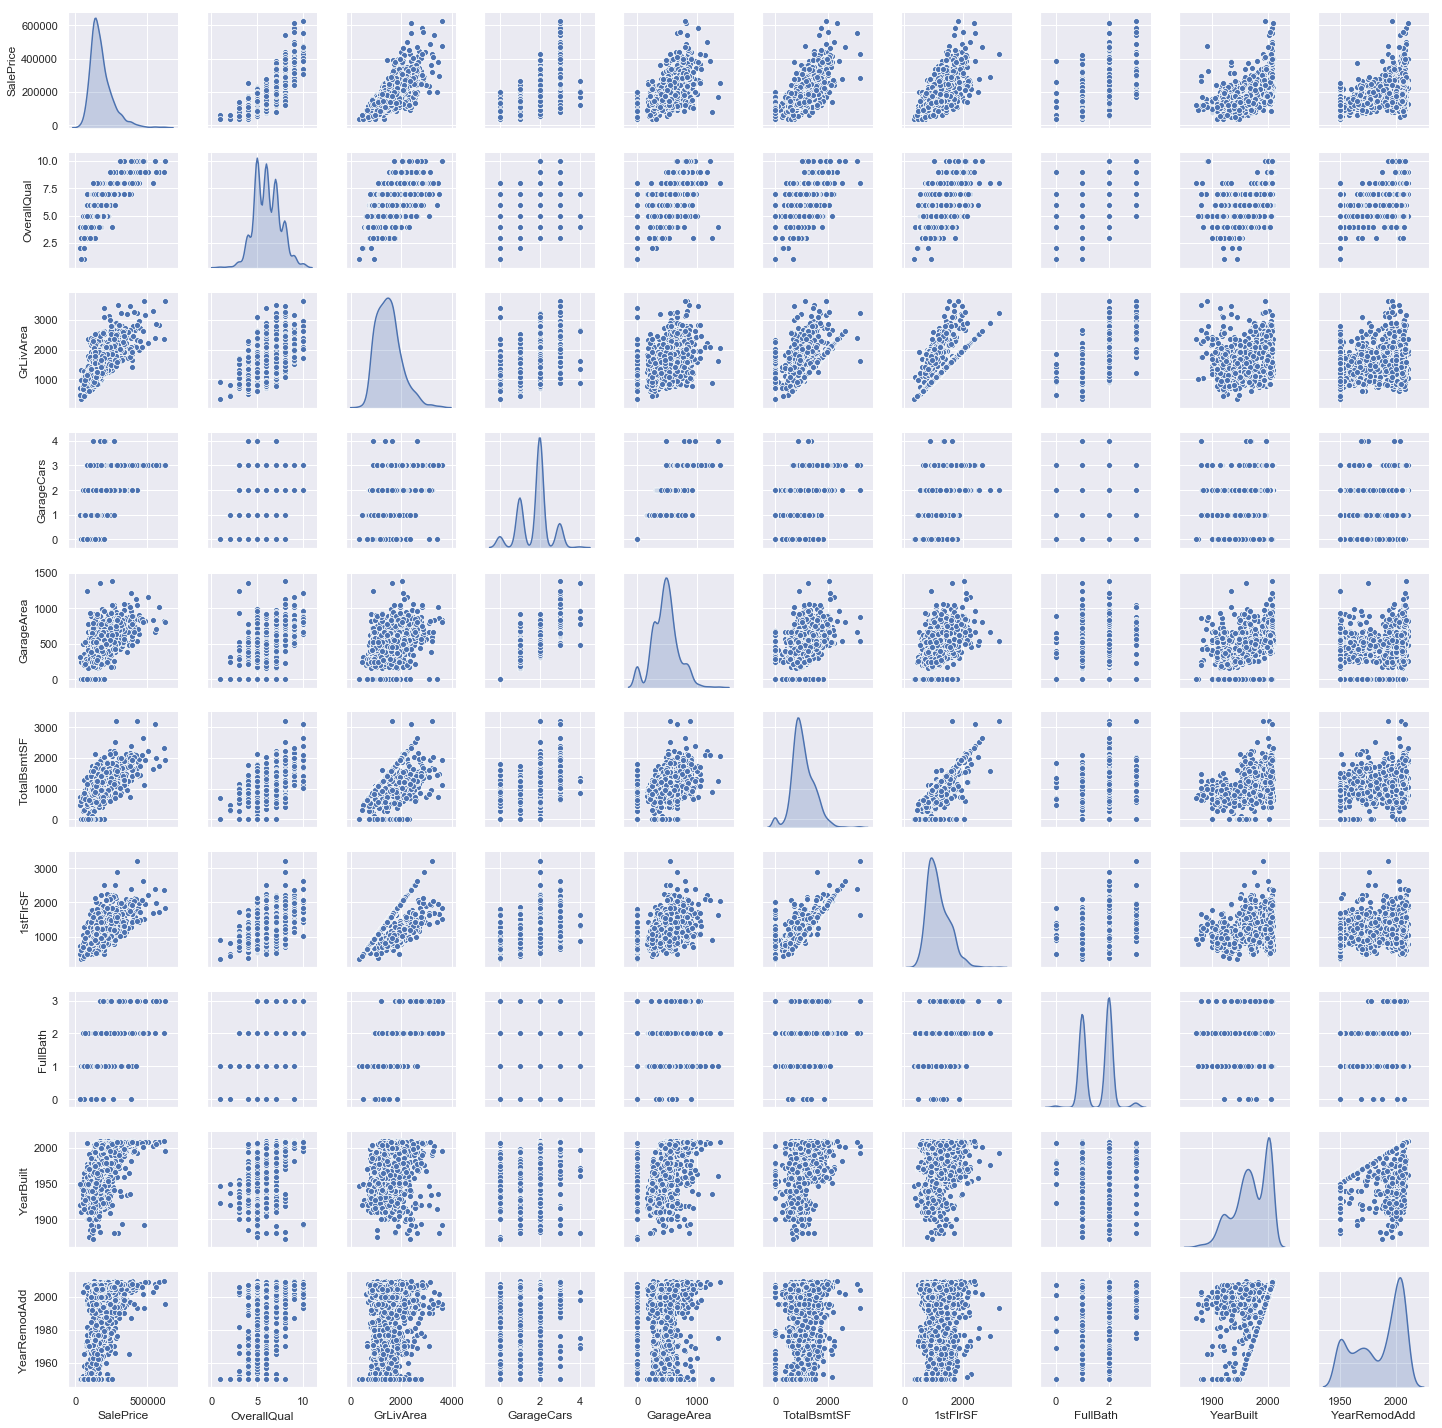

In [23]:
sns.set()
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde',palette='RdYlGn')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


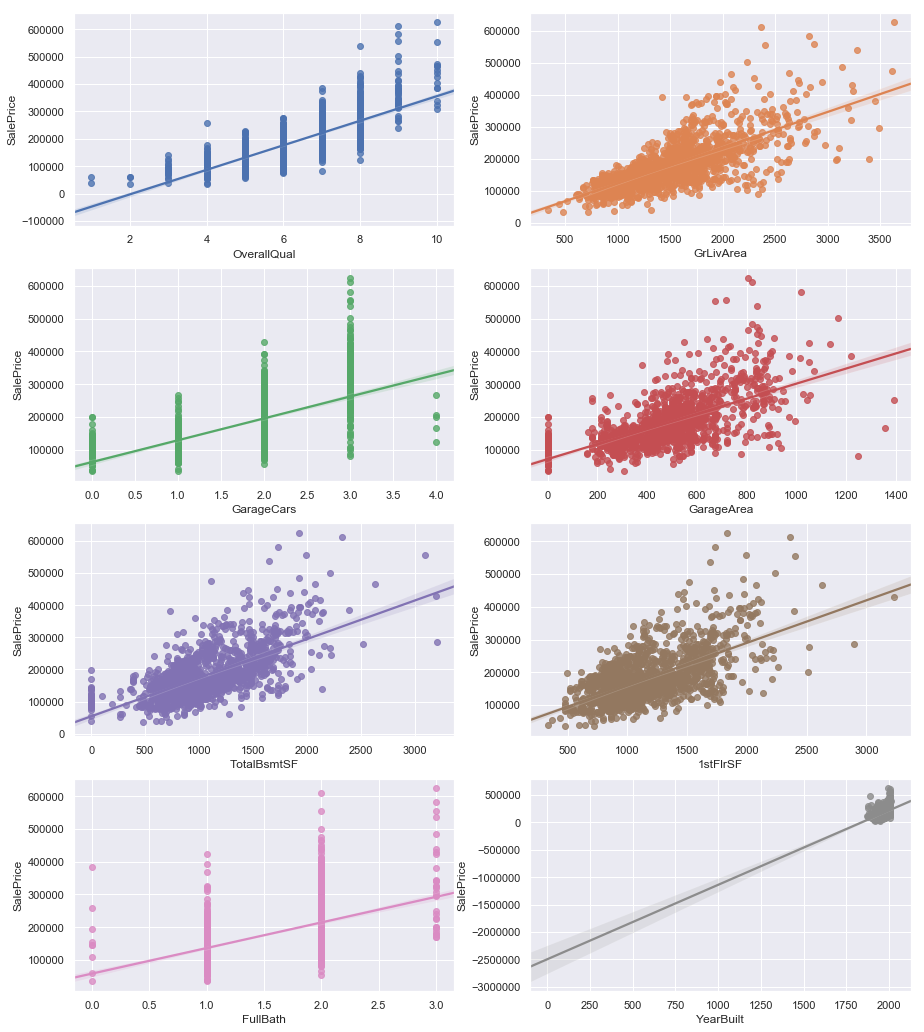

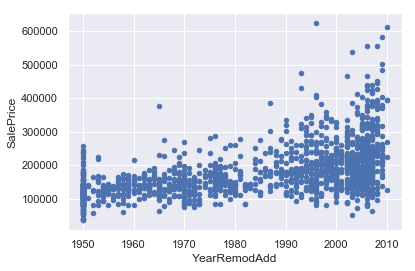

In [24]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(15,18))

OverallQual_scatter_plot = pd.concat([train['SalePrice'],train['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

GrLivArea_scatter_plot = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

GarageCars_scatter_plot = pd.concat([train['SalePrice'],train['GarageCars']],axis = 1)
sns.regplot(x='GarageCars',y = 'SalePrice',data = GarageCars_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

GarageArea_scatter_plot = pd.concat([train['SalePrice'],train['GarageArea']],axis = 1)
sns.regplot(x='GarageArea',y = 'SalePrice',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

FirsttFlrSF_scatter_plot = pd.concat([train['SalePrice'],train['1stFlrSF']],axis = 1)
sns.regplot(x='1stFlrSF',y = 'SalePrice',data = FirsttFlrSF_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

FullBath_scatter_plot = pd.concat([train['SalePrice'],train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

YearBuilt_scatter_plot = pd.concat([train['SalePrice'],train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

YearRemodAdd_scatter_plot = pd.concat([train['SalePrice'],train['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

De estos graficos se puede observar que el precio de las casas va aumentado en relacion a los años de construccion, por lo tanto si la casa es moderna valdrá más 

### Compeltar los datos perdidos

Se agruparan funciones en unas pocas operaciones diferentes según lo que mejor se adapte a su estructura:
 - Se puede reemplazar con una cadena
 - Se puede reemplazar con un entero
 - Se puede reemplazar con un cero
 - Se puede reemplazar con un valor especifico

In [25]:
#Para esta característica categórica todos los registros son "AllPub", excepto un "NoSeWa" y dos NA, por lo tanto
#no servirá para la prediccion
all_data = all_data.drop(['Utilities'], axis=1)

In [26]:
# Se reemplazan los valores perdidos con None
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 
            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass','Functional',
           'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna('None')

In [27]:
# Se reemplazan los valores perdidos con 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','LotFrontage'):
    all_data[col] = all_data[col].fillna(0)

In [28]:
# Observamos de nuevo los valores perdidos:
all_data_missing = (all_data.isnull().sum() / len(all_data)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_missing})
missing_data.head(30)

,Missing Ratio


In [29]:
# Convertimos aquellas variables que deberían ser categóricas, en lugar de numéricas
for col in ('MSSubClass', 'OverallCond', 'YrSold', 'MoSold'):
    all_data[col] = all_data[col].astype(str)

Por último, haremos un analisis para encontrar cualquier desequilibrio de clase significativo. Cualquier variable que esté representada por una sola clase en más del 97% se eliminará de los conjuntos de datos. 

In [30]:
only_class = [col for col in all_data.select_dtypes(exclude=['number']) if 1 - sum(all_data[col] == mode(all_data[col]))/len(all_data) < 0.03]
only_class

['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'Street']

In [31]:
# Borramos las caracteristicas encontradas
all_data = all_data.drop(['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'Street'], axis=1)

# Ingenieria del Conocimientos

In [33]:
#Creamos una función de "área total" agregando el área del sótano y el área de estar en el suelo
all_data['TotalArea'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']

#Creamos una característica de "área sobre el suelo" agregando las áreas del primer y segundo piso
all_data['AreaAbvground'] = all_data['1stFlrSF'] + all_data['2ndFlrSF']

#Creamos una función de "número total de baños" agregando todas las características del baño
all_data['TotalBaths'] = all_data['BsmtFullBath'] + all_data['BsmtHalfBath'] + all_data['FullBath'] + all_data['HalfBath'] 

### Añadir características categóricas ficticias

In [34]:
all_data = pd.get_dummies(all_data)

### Obtener los nuevos conjuntos de train y test.

In [35]:
train = all_data[:ntrain]
train['SalePrice'] = y_train
test = all_data[ntrain:]

# Guardamos los resultados

In [36]:
train.to_csv ('train_dummies.csv',sep=';')
test.to_csv ('test_dummies.csv',sep=';')